<a href="https://colab.research.google.com/github/SifulIslamTushar/AI-POC-contest-SRBD/blob/main/Object_detection_from_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import requests
from tensorflow import keras
from PIL import Image
from io import BytesIO

In [ ]:
# Load the TFLite model
model_path = '/content/lite-model_efficientdet_lite0_detection_metadata_1.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Load and preprocess your JPEG image
image_path = '/content/de.jpeg'
image = Image.open(image_path)
input_shape = input_details[0]['shape'][1:3]

In [ ]:
#take image from web.

# URL of the image you want to process
image_url = 'https://nationaltoday.com/wp-content/uploads/2020/12/National-Horse-Day-1.jpg'

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
input_shape = input_details[0]['shape'][1:3]

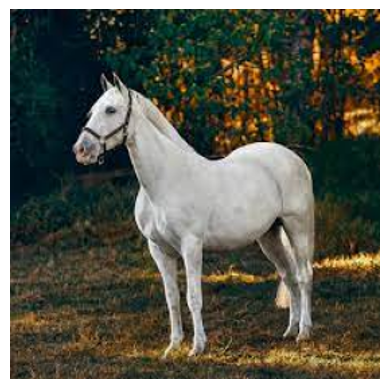

In [ ]:
# Resize and preprocess the image
image = image.resize(input_shape)
image = np.array(image, dtype=np.uint8)  # Convert to UINT8
image = np.expand_dims(image, axis=0)

#print the given image
plt.imshow(image[0])
plt.axis('off')
plt.show()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], image)
interpreter.invoke()

#boxes = interpreter.get_tensor(output_details[0]['index'])
classes = interpreter.get_tensor(output_details[1]['index'])
scores = interpreter.get_tensor(output_details[2]['index'])
num_detections = int(interpreter.get_tensor(output_details[3]['index']))

class_id:  19
Detected objects:  horse (Confidence: 0.94)


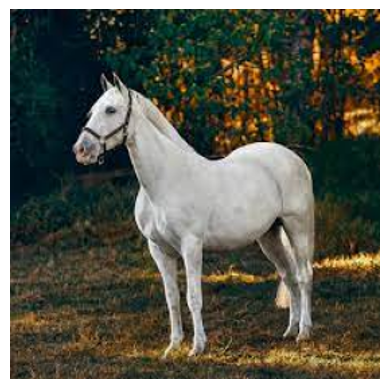

In [ ]:
threshold = 0.4  # Adjust this threshold as needed
detected_objects = []

class_names = [
    "person", "bicycle", "car", "motorcycle", "airplane",
    "bus", "train", "truck", "boat", "traffic light",
    "fire hydrant", "---", "stop sign", "parking meter", "bench",
    "bird", "cat", "dog", "horse", "sheep", "cow",
    "elephant", "bear", "zebra", "giraffe", "---", "backpack",
    "umbrella", "---", "---", "handbag", "tie", "suitcase", "frisbee",
    "skis", "snowboard", "sports ball", "kite", "baseball bat",
    "baseball glove", "skateboard", "surfboard", "tennis racket",
    "bottle", "---", "wine glass", "cup", "fork", "knife", "spoon",
    "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
    "carrot", "hot dog", "pizza", "donut", "cake", "chair",
    "couch", "potted plant", "bed", "---",  "dining table", "---", "---",
    "toilet", "---", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone",
    "microwave", "oven", "toaster", "sink", "refrigerator", "---", "book",
    "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush", "---"
]

for i in range(num_detections):
    if scores[0, i] > threshold:
        class_id = int(classes[0, i])
        class_name = class_names[class_id]
        confidence = scores[0, i]
        #detected_objects.append(class_name)
        print("class_id: ", class_id+1)
        label = f"{class_name} (Confidence: {confidence:.2f})"
        detected_objects.append(label)

# Print the detected object
#print("Detected objects:", ', '.join(detected_objects))

for object_label in detected_objects:
  print("Detected objects: ", object_label)

# Display the image with detected object names
plt.imshow(image[0])
plt.axis('off')
plt.show()